In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv',sep = ',')
test = pd.read_csv('test.csv',sep = ',')

In [3]:
#為了方便之後測試資料時，欄位不同導致錯誤，要先合併兩個資料表且讓欄位數相同
#新增is_train欄位來分辨是訓練集還是測試集
train['is train'] = 1
test['is train'] = 0
test['Survived'] = np.nan
df_all = pd.concat([train,test],sort = False , ignore_index = True)

資料清洗

In [5]:
for col in df_all.columns:
    print(f'{col}欄位值')
    print(df_all[col].unique())

PassengerId欄位值
[   1    2    3 ... 1307 1308 1309]
Survived欄位值
[ 0.  1. nan]
Pclass欄位值
[3 1 2]
Name欄位值
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
Sex欄位值
['male' 'female']
Age欄位值
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
SibSp欄位值
[1 0 3 4 2 5 8]
Parch欄位值
[0 1 2 5 3 4 6 9]
Ticket欄位值
['A/5 21171' 'PC 175

In [6]:
#刪除passengerld跟name
df_all = df_all.drop(columns = ['PassengerId','Name'])
#增加家人欄位、補全年齡缺失值&分群、補全登陸港缺失值
df_all['family_count'] = (df_all['SibSp'].fillna(0) + df_all['Parch'].fillna(0))

df_all['Age'] = df_all['Age'].fillna(df_all['Age'].median())
age_group = [0,20,30,40,50,60,100]
labels = ['<20', '21-30','31-40','41-50','51-60','>60']
df_all['age_group'] = pd.cut(df_all['Age'], bins = age_group , labels = labels)

df_all['Embarked'] = df_all['Embarked'].fillna(df_all['Embarked'].mode()[0])
df_all

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is train,family_count,age_group
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,21-30
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,31-40
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,21-30
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1,1,31-40
4,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,21-30
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,31-40
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,31-40
1307,NaN,3,male,28.0,0,0,359309,8.0500,NaN,S,0,0,21-30


In [7]:
#將測試集跟訓練集分開
df_train = df_all[df_all['is train'] == 1 ]
df_test = df_all[df_all['is train'] == 0]

探索性分析

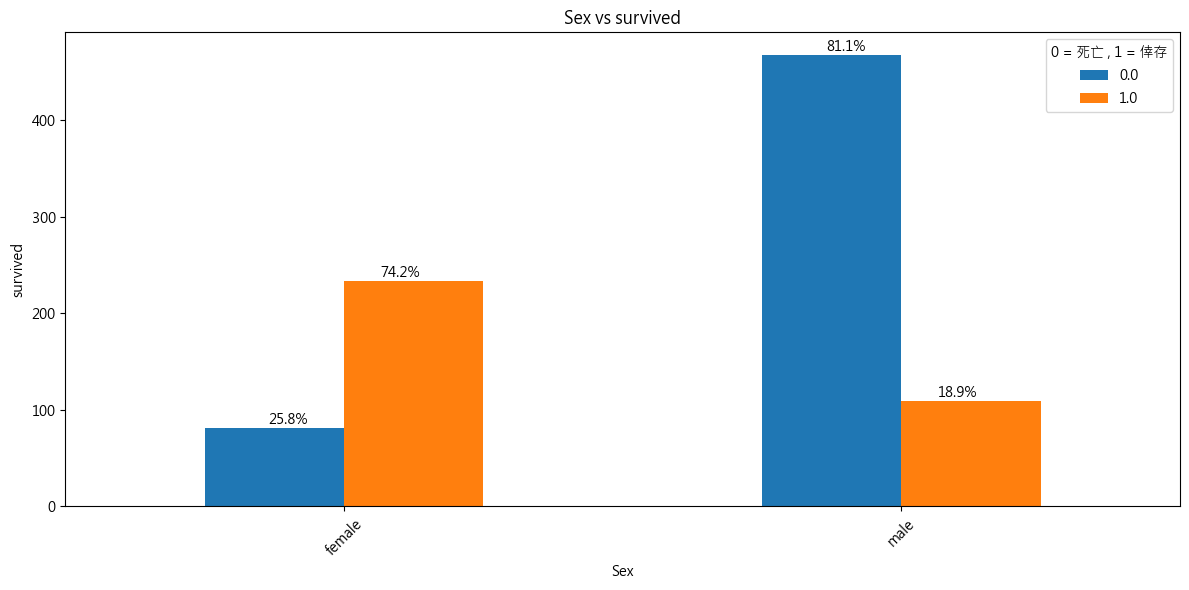

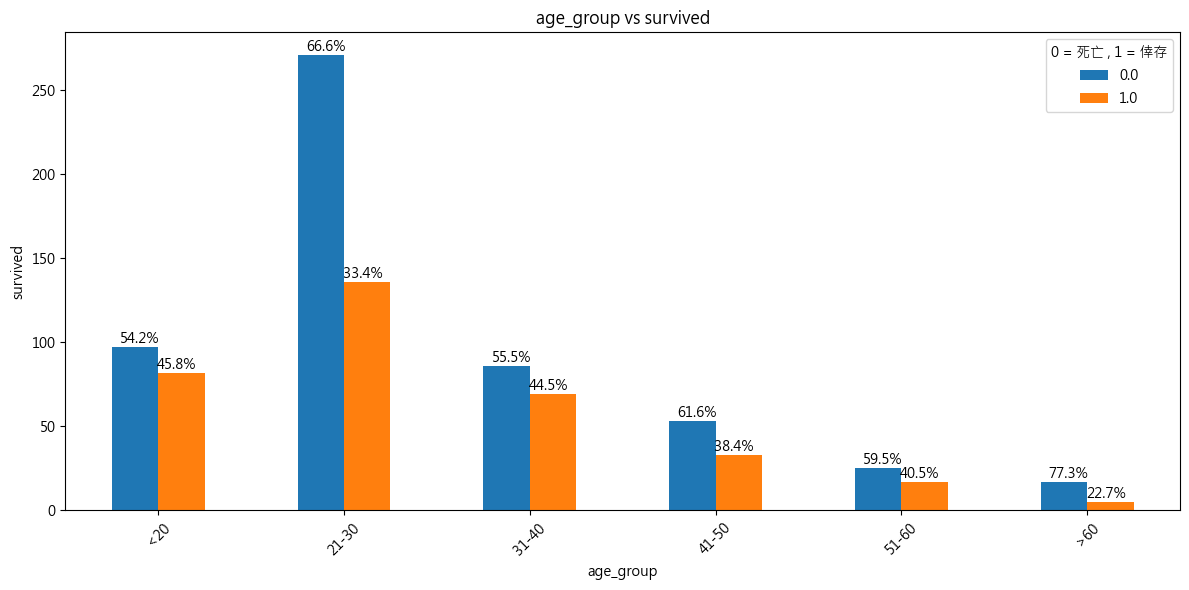

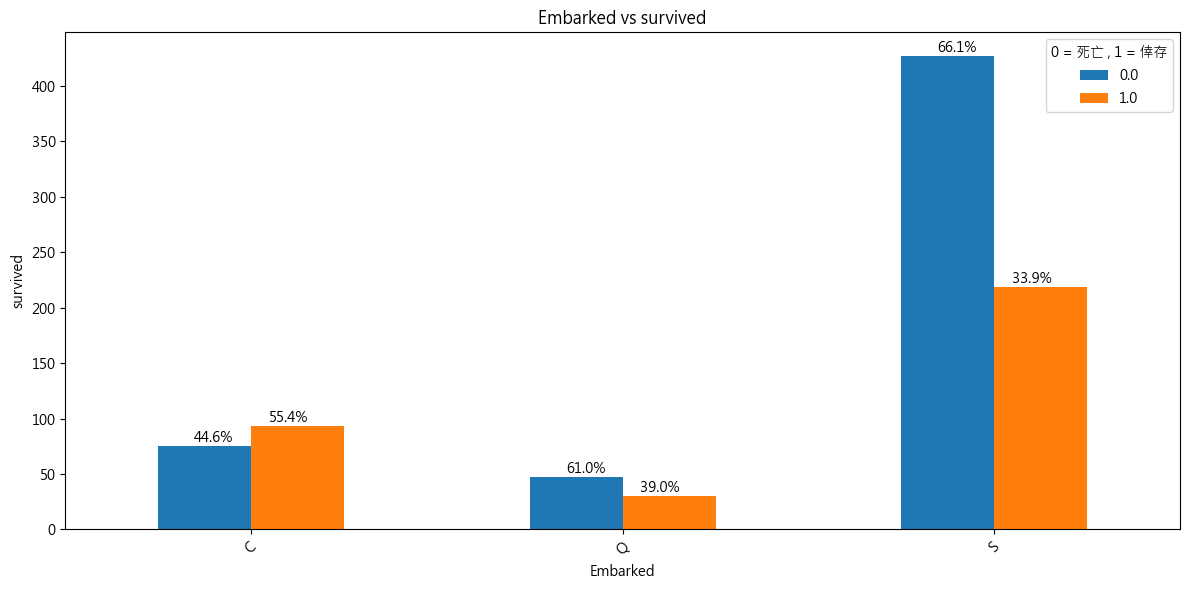

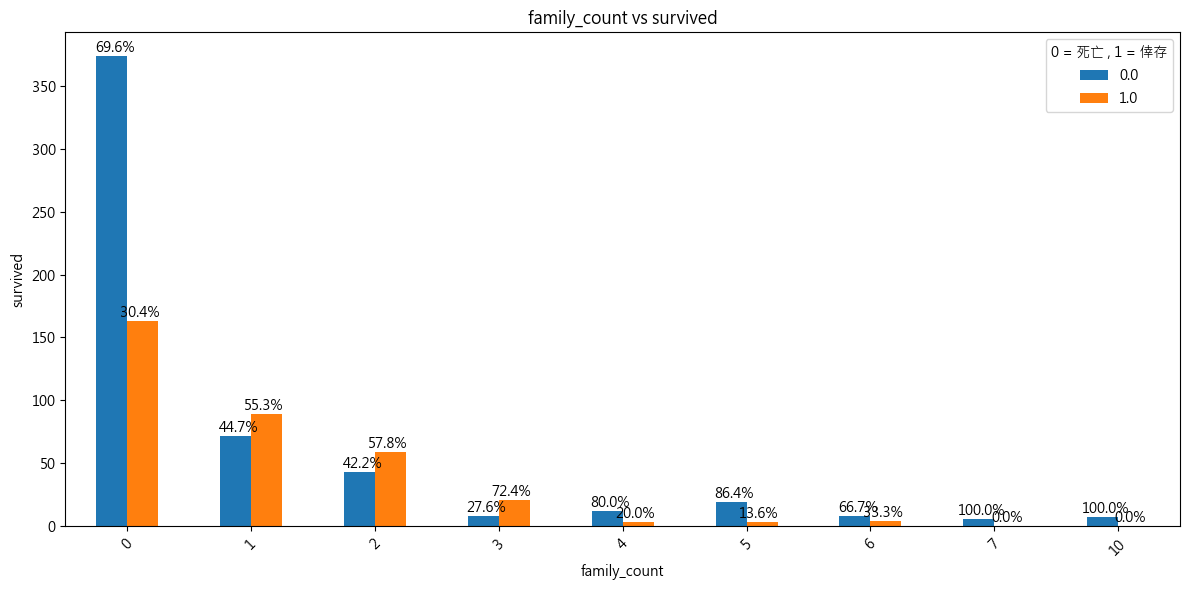

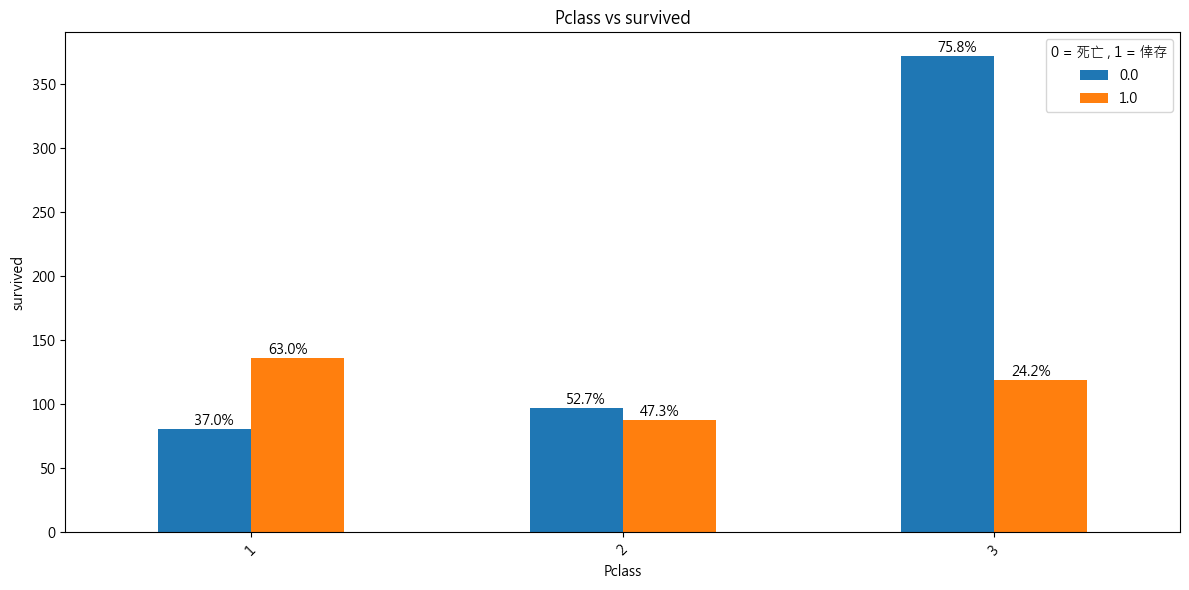

In [9]:
from matplotlib import rcParams
rcParams['font.family'] = ['Microsoft JhengHei','sans-serif']
rcParams['axes.unicode_minus'] = False
import seaborn as sns
import matplotlib.pyplot as plt
#把數值標註在長條圖上
cols = ['Sex','age_group','Embarked','family_count','Pclass']
for col in cols:
    group = df_train.groupby([col,'Survived'],observed = False).size().unstack(fill_value = 0)
    ax = group.plot(kind = 'bar',stacked = False , figsize = (12,6))
    rate = group[1] / (group[0] + group[1])
    for i,(x,rate) in enumerate(rate.items()):
        height = group.loc[x,1]
        ax.text(i + 0.1, height, f'{rate:.1%}',ha = 'center',va = 'bottom',color = 'black',fontsize = 10)
        death_height = group.loc[x,0]
        ax.text(i - 0.1, death_height, f'{1-rate:.1%}',ha = 'center',va = 'bottom',color = 'black',fontsize = 10)
    plt.title(f'{col} vs survived')
    plt.xlabel(col)
    plt.ylabel('survived')
    plt.legend(title = '0 = 死亡 , 1 = 倖存')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

統計分析(卡方檢定 + 邏輯斯回歸分析表)

In [11]:
#卡方檢定 + 邏輯斯回歸分析表
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
cols = ['Sex','age_group','Embarked','family_count','Pclass']
for col in cols:
    table = pd.crosstab(df_train[col],df_train['Survived'])
    chi2 , p , dof , expected = chi2_contingency(table)
    print(f'{col} vs survived')
    print(f'Chi2 Square 統計量 : {chi2:.2f}')
    print(f'p值 : {p:.2f}')
    print(f'自由度 : {dof:.2f}')
    if p < 0.05:
        print(f'{col}對倖存有顯著影響')
    else:
        print(f'{col}對倖存沒有顯著影響')
    print()
    formula = f"Survived ~ {col}"
    model = smf.logit(formula ,data = df_train).fit()
    print(model.summary())

Sex vs survived
Chi2 Square 統計量 : 260.72
p值 : 0.00
自由度 : 1.00
Sex對倖存有顯著影響

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Sep 2025   Pseudo R-squ.:                  0.2266
Time:                        14:08:29   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.1

In [12]:
#五種變數
formula = "Survived ~ Sex + age_group + Embarked + C(Pclass) + family_count"
model_5 = smf.logit(formula ,data = df_train).fit()
print(model_5.summary())

Optimization terminated successfully.
         Current function value: 0.444150
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Mon, 29 Sep 2025   Pseudo R-squ.:                  0.3330
Time:                        14:08:29   Log-Likelihood:                -395.74
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.454e-78
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8005      0.385      9.865      0.000       3.045       4.556
Sex[T

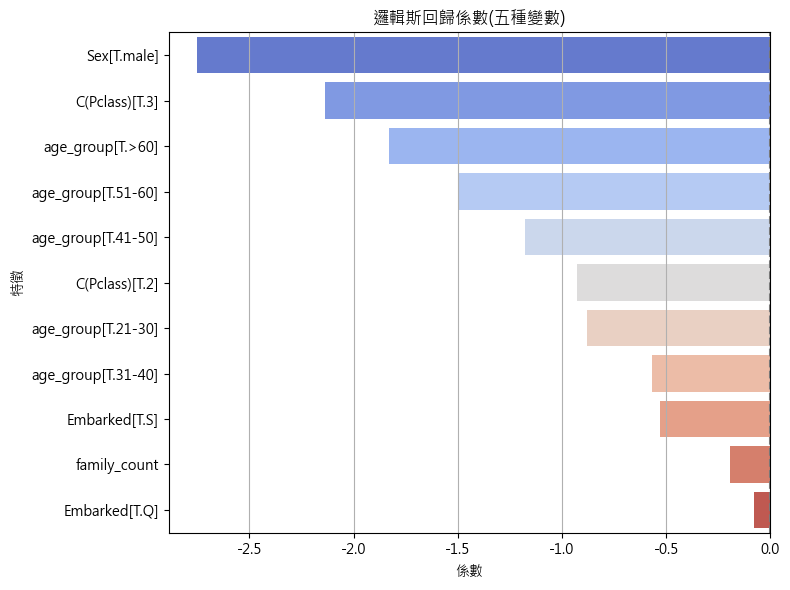

In [13]:
#畫係數圖
import seaborn as sns
import matplotlib.pyplot as plt
coef_df = model_5.params[1:]
coef_df = coef_df.sort_values()
plt.figure(figsize = (8,6))
sns.barplot(x = coef_df.values , y = coef_df.index , hue = coef_df.index , palette = 'coolwarm')
plt.title('邏輯斯回歸係數(五種變數)')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('係數')
plt.ylabel('特徵')
plt.grid(True , axis = 'x')
plt.tight_layout()
plt.show()

In [14]:
#邏輯斯回歸模組
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , roc_curve , make_scorer
from sklearn.metrics import accuracy_score , precision_score , f1_score
#隨機森林模組
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , f1_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
# XGBoost 模組
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score , precision_score , f1_score , classification_report , roc_auc_score
from sklearn.model_selection import cross_val_score

In [97]:
#單純用訓練集做交叉驗證
def train_cv (x, y , model_name , cv_folds = 5):
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state = 42)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state = 42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state = 42,eval_metric = 'logloss')
    else :
        raise ValueError('模型名稱錯誤，請確認後再輸入')
    #交叉驗證
    cv = StratifiedKFold(n_splits = cv_folds ,shuffle = True ,random_state = 42)
    accuracy = [] 
    precision = [] 
    f1_scores = [] 
    auc_scores = []
    for train_idx, test_idx in cv.split(x , y):
        x_train , x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train , y_test = y.iloc[train_idx] , y.iloc[test_idx]
        model.fit(x_train , y_train)
        y_pred = model.predict(x_test)
        #計算acu_score
        y_prob = model.predict_proba(x_test)[:,1]
        accuracy.append(accuracy_score(y_test,y_pred))
        precision.append(precision_score(y_test,y_pred,average = 'macro',zero_division = 0))
        f1_scores.append(f1_score(y_test,y_pred,average = 'macro',zero_division = 0))
        auc_scores.append(roc_auc_score(y_test,y_prob))
        
        results={
            'model' : model,
            'precision' : np.mean(precision),
            'f1_score' : np.mean(f1_scores),
            'accuracy' : np.mean(accuracy),
            'auc score': np.mean(auc_scores),
            'report': classification_report(y_test,y_pred,zero_division = 0)}
    return results

In [16]:
#邏輯斯回歸(五種變數 - 交叉驗證)
col = ['age_group','Sex','Embarked']
num_col = ['family_count','Pclass']
df_train_encoded = pd.get_dummies(df_train,columns = col, drop_first = True)
age_col = [c for c in df_train_encoded.columns if 'age_group' in c ]
sex_col = [c for c in df_train_encoded.columns if 'Sex' in c]
emb_col = [c for c in df_train_encoded.columns if 'Embarked' in c]
obf_cols = age_col + sex_col + emb_col
df_train_encoded = df_train_encoded[obf_cols + num_col]
x_log = df_train_encoded
y_log = df_train['Survived']
log_result = train_cv(x_log,y_log,model_name = 'LogisticRegression')
print('Logistic Regression Report:\n',log_result['report'])
print(f'Logistic Regression AUC score cv :{log_result['auc score']:.4f}')
print(f'Logistic Regression precision cv :{log_result['precision']:.4f}')
print(f'Logistic Regression f1 score cv :{log_result['f1_score']:.4f}')
print(f'Logistic Regression accuracy cv :{log_result['accuracy']:.4f}')

Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       109
         1.0       0.81      0.75      0.78        69

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178

Logistic Regression AUC score cv :0.8467
Logistic Regression precision cv :0.7885
Logistic Regression f1 score cv :0.7814
Logistic Regression accuracy cv :0.7969


In [105]:
#隨機森林(五種變數 - 交叉驗證)
col = ['age_group','Sex','Embarked']
num_col = ['family_count','Pclass']
df_train_encoded = pd.get_dummies(df_train,columns = col,drop_first = True)
age_col = [c for c in df_train_encoded.columns if 'age_group' in c]
sex_col = [c for c in df_train_encoded.columns if 'Sex' in c]
emb_col = [c for c in df_train_encoded.columns if 'Embarked' in c]
obj_col = age_col + sex_col + emb_col
df_train_encoded = df_train_encoded[obj_col + num_col]
x_rf = df_train_encoded
y_rf = df_train['Survived']
rf_result = train_cv(x_rf , y_rf ,model_name = 'RandomForest')
print('RandomForest Report : \n',rf_result['report'])
print(f'RandomForest AUC score cv : {rf_result['auc score']:.4f}')
print(f'RandomForest preciosion cv :{rf_result['precision']:.4f}')
print(f'RandomForest f1 score cv : {rf_result['f1_score']:.4f}')
print(f'RandomForest accuracy cv : {rf_result['accuracy']:.4f}')

RandomForest Report : 
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       109
         1.0       0.84      0.67      0.74        69

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178

RandomForest AUC score cv : 0.8421
RandomForest preciosion cv :0.7891
RandomForest f1 score cv : 0.7765
RandomForest accuracy cv : 0.7946


In [103]:
# XGBoost(五種變數 - 交叉驗證)
col = ['age_group','Sex','Embarked']
num_col = ['family_count','Pclass']
df_train_encoded = pd.get_dummies(df_train,columns = col,drop_first = True)
age_col = [c for c in df_train_encoded.columns if 'age_group' in c ]
sex_col = [c for c in df_train_encoded.columns if 'Sex' in c]
emb_col = [c for c in df_train_encoded.columns if 'Embarkded' in c]
obj_col = age_col + sex_col + emb_col
df_train_encoded = df_train_encoded[obj_col + num_col]
x_xgb = df_train_encoded
y_xgb = df_train['Survived']
xgb_result = train_cv(x_xgb,y_xgb,model_name = 'XGBoost')
print('XGBoost Report :',xgb_result['report'])
print(f'XGBoost AUC score cv : {xgb_result['auc score']:4f}')
print(f'XGBoost precision cv : {xgb_result['precision']:.4f}')
print(f'XGBoost f1 score cv : {xgb_result['f1_score']:.4f}')
print(f'XGBoost accuracy cv : {xgb_result['accuracy']:.4f}')

XGBoost Report :               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       109
         1.0       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178

XGBoost AUC score cv : 0.858978
XGBoost precision cv : 0.7898
XGBoost f1 score cv : 0.7841
XGBoost accuracy cv : 0.7991


In [57]:
#預測測試集
def train_test (x_train , y_train ,x_test,y_test = None,model_name = 'LogisticRegression'):
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state = 42)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state = 42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state = 42 ,eval_metric = 'logloss')
    else:
        raise ValueError('模型名稱錯誤，請確認後再輸入')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

In [65]:
# 邏輯斯回歸(測試)
#訓練資料處理
col = ['age_group','Sex','Embarked']
num_col = ['family_count','Pclass']
df_train_encoded = pd.get_dummies(df_train,columns = col,drop_first = True)
age_col = [c for c in df_train_encoded.columns if 'age_group' in c]
sex_col = [c for c in df_train_encoded.columns if 'Sex' in c]
emb_col = [c for c in df_train_encoded.columns if 'Embarked' in c]
obj_col = age_col + sex_col + emb_col
df_train_encoded = df_train_encoded[obj_col + num_col]
x_log_train = df_train_encoded
y_log_train = df_train['Survived']
#測試資料處理
df_test_encoded = pd.get_dummies(df_test,columns = col,drop_first = True)
df_test_encoded_log = df_test_encoded[obj_col + num_col].copy()
x_log_test = df_test_encoded_log
#開始測試
y_pred = train_test(x_log_train , y_log_train , x_log_test ,model_name = 'LogisticRegression')
df_test_encoded_log.loc[:, 'pred survived'] = y_pred
df_test_encoded_log

,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_>60,Sex_male,Embarked_Q,Embarked_S,family_count,Pclass,pred survived
891,False,True,False,False,False,True,True,False,0,3,0.0
892,False,False,True,False,False,False,False,True,1,3,0.0
893,False,False,False,False,True,True,True,False,0,2,0.0
894,True,False,False,False,False,True,False,True,0,3,0.0
895,True,False,False,False,False,False,False,True,2,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,True,False,False,False,False,True,False,True,0,3,0.0
1305,False,True,False,False,False,False,False,False,0,1,1.0
1306,False,True,False,False,False,True,False,True,0,3,0.0
1307,True,False,False,False,False,True,False,True,0,3,0.0


In [69]:
#隨機森林(測試)
x_rf_train = df_train_encoded
y_rf_train = df_train['Survived']
df_test_encoded = pd.get_dummies(df_test,columns = col,drop_first = True)
df_test_encoded_rf = df_test_encoded[obj_col + num_col].copy()
x_rf_test = df_test_encoded_rf
# 開始測試
y_pred = train_test(x_rf_train , y_rf_train , x_rf_test , model_name = 'RandomForest')
df_test_encoded_rf.loc[:,'pred_survived'] = y_pred
df_test_encoded_rf

,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_>60,Sex_male,Embarked_Q,Embarked_S,family_count,Pclass,pred_survived
891,False,True,False,False,False,True,True,False,0,3,0.0
892,False,False,True,False,False,False,False,True,1,3,0.0
893,False,False,False,False,True,True,True,False,0,2,0.0
894,True,False,False,False,False,True,False,True,0,3,0.0
895,True,False,False,False,False,False,False,True,2,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,True,False,False,False,False,True,False,True,0,3,0.0
1305,False,True,False,False,False,False,False,False,0,1,1.0
1306,False,True,False,False,False,True,False,True,0,3,0.0
1307,True,False,False,False,False,True,False,True,0,3,0.0


In [71]:
# XGBoost(測試)
x_xgb_train = df_train_encoded
y_xgb_train = df_train['Survived']
df_test_encoded = pd.get_dummies(df_test,columns = col,drop_first = True)
df_test_encoded_xgb = df_test_encoded[obj_col + num_col].copy()
x_xgb_test = df_test_encoded_xgb
# 開始測試
y_pred = train_test(x_xgb_train , y_xgb_train , x_xgb_test, model_name = 'XGBoost')
df_test_encoded_xgb.loc[:,'pred_survived'] = y_pred
df_test_encoded_xgb

,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_>60,Sex_male,Embarked_Q,Embarked_S,family_count,Pclass,pred_survived
891,False,True,False,False,False,True,True,False,0,3,0
892,False,False,True,False,False,False,False,True,1,3,0
893,False,False,False,False,True,True,True,False,0,2,0
894,True,False,False,False,False,True,False,True,0,3,0
895,True,False,False,False,False,False,False,True,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,True,False,False,False,False,True,False,True,0,3,0
1305,False,True,False,False,False,False,False,False,0,1,1
1306,False,True,False,False,False,True,False,True,0,3,0
1307,True,False,False,False,False,True,False,True,0,3,0
